# Cubism - Driver Alert Classifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from time import time

%matplotlib inline

In [2]:
data = pd.read_csv("IsAlert-Train.csv")

In [20]:
test = pd.read_csv("IsAlert_Test1.csv")

In [3]:
data.head()

,TrialID,ObsNum,physiologicl_att1,physiological_att2,physiologicl_att13,physiologicl_att14,physiologicl_att15,physiologicl_att16,physiologicl_att17,environmental_att1,...,environmental_att10,vehicular_att1,vehicular_att2,vehicular_att3,vehicular_att4,vehicular_att5,vehicular_att6,vehicular_att7,vehicular_att8,IsAlert
0,0,16,37.0386,14.7910,900,66.6667,0.252978,600,100.0,0.0,...,0.0,101.56,0.665,752,7.48125,1981,6.0,4,14.9408,1
1,0,17,37.3313,12.9457,900,66.6667,0.252978,600,100.0,0.0,...,0.0,101.56,0.665,752,7.48125,1981,6.0,4,14.9693,1
2,0,18,37.5480,9.8063,900,66.6667,0.252978,600,100.0,0.0,...,0.0,101.61,0.560,1008,7.48125,1981,5.6,4,14.9926,1
3,0,19,37.6629,12.6057,900,66.6667,0.252978,600,100.0,0.0,...,0.0,101.55,0.665,1008,7.48125,1994,5.6,4,15.0043,1
4,0,20,37.7078,16.2024,900,66.6667,0.252978,600,100.0,0.0,...,0.0,101.43,0.455,1008,7.48125,2011,5.6,4,15.0168,1


# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216556 entries, 0 to 216555
Data columns (total 28 columns):
TrialID                216556 non-null int64
ObsNum                 216556 non-null int64
physiologicl_att1      216556 non-null float64
physiological_att2     216556 non-null float64
physiologicl_att13     216556 non-null int64
physiologicl_att14     216556 non-null float64
physiologicl_att15     216556 non-null float64
physiologicl_att16     216556 non-null int64
physiologicl_att17     216556 non-null float64
environmental_att1     216556 non-null float64
environmental_att2     216556 non-null float64
environmental_att3     216556 non-null int64
environmental_att4     216556 non-null float64
environmental_att5     216556 non-null int64
environmental_att6     216556 non-null int64
environmental_att7     216556 non-null int64
environmental_att8     216556 non-null int64
environmental_att9     216556 non-null int64
environmental_att10    216556 non-null float64
vehicular_att1  

In [17]:
data.vehicular_att7.mode()

0    4
dtype: int64

In [7]:
data.describe()

,TrialID,ObsNum,physiologicl_att1,physiological_att2,physiologicl_att13,physiologicl_att14,physiologicl_att15,physiologicl_att16,physiologicl_att17,environmental_att1,...,environmental_att10,vehicular_att1,vehicular_att2,vehicular_att3,vehicular_att4,vehicular_att5,vehicular_att6,vehicular_att7,vehicular_att8,IsAlert
count,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,...,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000,216556.000000
mean,151.952650,605.038904,35.442544,12.018026,1024.607741,63.977760,0.174476,849.278136,73.904791,12.225888,...,0.844812,88.080942,-0.051163,575.014052,11.366705,1863.210851,14.236593,3.527439,12.059365,0.674417
std,74.373847,348.057737,7.143701,3.845889,303.430221,19.375862,0.095333,177.781803,16.002357,14.854635,...,4.264997,39.872811,0.418729,292.123634,36.989194,567.872244,11.497482,1.082294,3.386516,0.468593
min,0.000000,0.000000,20.131900,-18.197100,504.000000,27.372300,0.040217,136.000000,38.461500,0.000000,...,0.000000,0.000000,-4.795000,240.000000,0.000000,533.000000,0.000000,1.000000,6.204210,0.000000
25%,109.000000,304.000000,31.290000,9.735540,800.000000,49.505000,0.093407,688.000000,60.728700,0.000000,...,0.000000,92.360000,-0.175000,255.000000,1.487500,1867.000000,0.000000,4.000000,9.040930,0.000000
50%,167.000000,606.000000,33.983500,11.306700,1000.000000,60.000000,0.112867,860.000000,69.767400,0.000000,...,0.000000,104.780000,0.000000,511.000000,4.506250,2070.000000,15.200000,4.000000,11.170200,1.000000
75%,212.000000,906.000000,37.525450,13.802400,1212.000000,75.000000,0.277627,988.000000,87.209300,29.796000,...,0.000000,112.220000,0.070000,767.000000,5.993750,2212.000000,23.200000,4.000000,15.380400,1.000000
max,257.000000,1210.000000,95.211700,56.395600,2192.000000,119.048000,0.396981,1560.000000,441.176000,243.991000,...,41.600000,127.470000,3.990000,1023.000000,478.494000,3496.000000,64.900000,7.000000,23.469900,1.000000


In [11]:
data.IsAlert.value_counts() / data.shape[0]

1    0.674417
0    0.325583
Name: IsAlert, dtype: float64

In [3]:
sns.pairplot(data.drop('TrialID',axis=1),hue='IsAlert')

C:\Users\Jared Chung\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


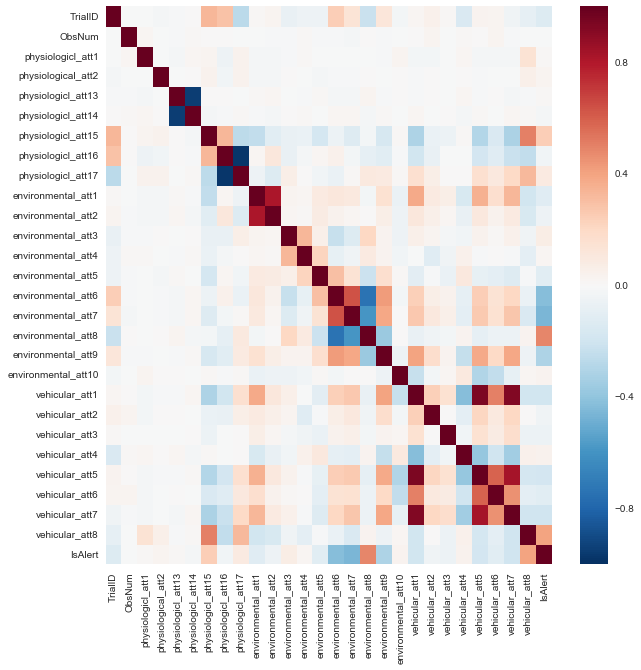

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr())

# Data Preparation

In [29]:
X = data.drop(['TrialID','IsAlert'],axis=1)
Y = data.IsAlert

In [21]:
test_X = test.drop(['TrialID','IsAlert'],axis=1)
test_Y = test.IsAlert

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [22]:
test_X = scaler.transform(test_X)

In [30]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2,random_state=42)

# Modelling

### TPOT

In [ ]:
from tpot import TPOT

tpot = TPOT(generations=5, verbosity=2)
tpot.fit(train_X,train_Y)

print tpot.score(test_X,test_Y)
tpot.export('tpot_alert_pipeline.py')

## Random Forest

In [10]:

clf = RandomForestClassifier(n_estimators=400,random_state=42, n_jobs=-1)

scores = cross_val_score(clf,train_X,train_Y,cv=5,scoring='roc_auc')

print "accuracy %0.4f +/- %0.4f" % (scores.mean(),scores.std())

accuracy 0.9994 +/- 0.0001


In [79]:
print metrics.confusion_matrix(predict_forest, test_Y)

[[13752    16]
 [  179 29365]]


In [89]:
clf = RandomForestClassifier(n_estimators=400,random_state=42, n_jobs=-1)
clf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf.predict_proba(test_X)[:,1]
fpr, tpr, _ = metrics.roc_curve(test_Y, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
#ggplot(df, aes(x='fpr', y='tpr')) +\
#    geom_line() +\
#    geom_abline(linetype='dashed')
plt.figure()
plt.plot(fpr[2], tpr[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\Jared Chung\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [ ]:
# 400 trees - 5 fold - score = 0.7961 +/- 0.1129

In [70]:
fig, ax = plt.subplots(figsize(10,10))
feature_importance = clf.feature_importances_
# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

ax.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
tt = time()
clf = RandomForestClassifier(n_estimators=400,random_state=42, n_jobs=-1)

scores = cross_val_score(clf,X,Y,cv=10,scoring='roc_auc')

t = tt - time()
print "Score %.5f +/- %.5f " % (logreg.scores_[1].mean(),logreg.scores_[1].std())
print t

Score 0.83659 +/- 0.08853 
-376.226999998


In [26]:
tt = time()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=400,random_state=42, n_jobs=-1)
clf.fit(train_X,train_Y)
print time() - tt
predict_forest = clf.predict(test_X)
print time() - tt
"""
print metrics.classification_report(predict_forest, test_Y)
print "-------------------"
print "AUC score %0.4f" % (metrics.roc_auc_score(predict_forest, test_Y))
print metrics.confusion_matrix(predict_forest, test_Y)
print "-------------------"
"""
#print time() - tt

56.8980000019
58.0299999714


'\nprint metrics.classification_report(predict_forest, test_Y)\nprint "-------------------"\nprint "AUC score %0.4f" % (metrics.roc_auc_score(predict_forest, test_Y))\nprint metrics.confusion_matrix(predict_forest, test_Y)\nprint "-------------------"\n'

In [27]:
58.0299999714 - 56.8980000019

1.1319999695000007

### K Nearest Neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier
tt = time()
clf = KNeighborsClassifier()

scores = cross_val_score(clf,X,Y,cv=10,scoring='roc_auc')

t = tt - time()
print "Score %.5f +/- %.5f " % (logreg.scores_[1].mean(),logreg.scores_[1].std())
print t

Score 0.83612 +/- 0.12302 
-33.6640000343


In [36]:
tt = time()
clf.fit(train_X,train_Y)
print time() - tt
clf.predict(test_X)
print  time() - tt

0.790999889374
6.19899988174


In [37]:
6.19899988174 - 0.790999889374

5.407999992365999

## Logistic Regression 

In [18]:
tt = time()
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(class_weight = 'balanced',cv = 10,scoring='roc_auc',n_jobs=-1,random_state=42)
logreg.fit(X,Y)
print "Score %.5f +/- %.5f " % (logreg.scores_[1].mean(),logreg.scores_[1].std())

print time() - tt

Score 0.87691 +/- 0.08523 
20.0669999123


In [23]:
predict = logreg.predict(test_X)

print metrics.roc_auc_score(predict,test_Y)

0.768699719987


In [24]:
from sklearn.linear_model import LogisticRegression
tt = time()
clf = LogisticRegression()

scores = cross_val_score(clf,X,Y,cv=10,scoring='roc_auc')

t = tt - time()
print "Score %.5f +/- %.5f " % (logreg.scores_[1].mean(),logreg.scores_[1].std())
print t

Score 0.83612 +/- 0.12302 
-222.612000227


In [25]:
tt = time()
clf.fit(train_X,train_Y)
print time() - tt
clf.predict(test_X)
print  time() - tt

24.0239999294
24.0319998264


In [30]:
clf.predict(test_X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
24.0319998264 - 24.0239999294

0.007999897000001255

In [ ]:
predict_log = logreg.predict(test_X)
log_result = metrics.classification_report(predict_log, test_Y)
print  metrics.
print log_result
print "-------------------"
print "AUC score %0.4f" % (metrics.roc_auc_score(predict_log, test_Y))

## XGboost

In [38]:
import xgboost as xgb

In [39]:
tt = time() 
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

scores = cross_val_score(xgb1,X,Y,cv=10,scoring='roc_auc')

print "accuracy %0.4f +/- %0.4f" % (scores.mean(),scores.std())
print time() - tt

accuracy 0.8043 +/- 0.2031
1142.65600014


In [40]:
scores

array([ 0.9983625 ,  0.99961258,  0.78933377,  0.93287808,  0.72495218,
        0.88738956,  0.80805372,  0.70414197,  0.2733421 ,  0.92503266])

In [41]:
tt = time()
xgb1.fit(train_X,train_Y)
print time() - tt
xgb1.predict(test_X)
print  time() - tt

111.235000134
111.434000015


In [42]:
111.434000015 - 111.235000134

0.19899988099999177

In [33]:
def modelfit(alg,x,y,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=['auc'],early_stopping_rounds=early_stopping_rounds, show_progress=False)
        print cvresult.shape[0]
        alg.set_params(n_estimators=cvresult.shape[0])
        
    
    
    #Fit the algorithm on the data
    alg.fit(x, y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(x)
    dtrain_predprob = alg.predict_proba(x)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob)
    

    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    #plt.show()

In [34]:
tt = time()
#Initiate model with 
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

modelfit(alg=xgb1, x=X,y=Y)

Will train until cv error hasn't decreased in 50 rounds.



Model Report
Accuracy : 0.9685
AUC Score (Train): 0.993692


In [111]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(
estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27)
, 
param_grid = param_test1, scoring='roc_auc',iid=False, cv=5
)

gsearch1.fit(train_X,train_Y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

KeyboardInterrupt: 

In [ ]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

scores = cross_val_score(xgb1,X,Y,cv=5,scoring='roc_auc')

print "accuracy %0.4f +/- %0.4f" % (scores.mean(),scores.std())

In [110]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

xgb1.fit(train_X,train_Y)

predict = xgb1.predict(test_X)

print "Confusion Matrix"
print metrics.confusion_matrix(predict, test_Y)
print "-----------------"
print metrics.classification_report(predict, test_Y)
print "-------------------"
print "AUC score %0.4f" % (metrics.roc_auc_score(predict, test_Y))

Confusion Matrix
[[12518   149]
 [ 1413 29232]]
-----------------
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     12667
          1       0.99      0.95      0.97     30645

avg / total       0.97      0.96      0.96     43312

-------------------
AUC score 0.9711


In [82]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

xgb1.fit(X,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [92]:
data2 = pd.read_csv("IsAlert_Test1.csv")

In [93]:
test_XX = data2.drop(['TrialID','IsAlert','environmental_att2','environmental_att10','environmental_att6','physiologicl_att17','physiologicl_att13','vehicular_att1',
               'vehicular_att4','vehicular_att6'],axis=1)
test_YY = data2.IsAlert

In [97]:
test_YY.shape

(241708L,)

In [98]:
test_XX.shape

(241708, 26)

In [99]:
predict = xgb1.predict(test_XX)

In [106]:
print "Confusion Matrix"
print metrics.confusion_matrix(predict, test_YY)
print "-----------------"
print metrics.classification_report(predict, test_YY)
print "-------------------"
print "AUC score %0.4f" % (metrics.roc_auc_score(predict, test_YY))

Confusion Matrix
[[ 60060  16547]
 [ 58371 106730]]
-----------------
             precision    recall  f1-score   support

          0       0.51      0.78      0.62     76607
          1       0.87      0.65      0.74    165101

avg / total       0.75      0.69      0.70    241708

-------------------
AUC score 0.7152


In [103]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = xgb1.predict_proba(test_XX)[:,1]
fpr, tpr, _ = metrics.roc_curve(test_YY, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

<ggplot: (83594858)>

In [107]:
data2.IsAlert.value_counts()

1    123277
0    118431
Name: IsAlert, dtype: int64